# Matplotlib: Histograms df.plot(kind='hist')
great for showing distribution of data

In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\abc\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

Text(0, 0.5, 'No of Jobs')

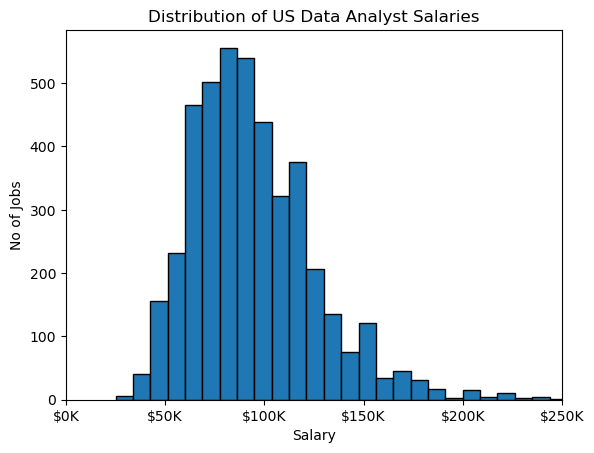

In [6]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(0,250000)
ax = plt.gca() # get the current axes
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))
plt.title("Distribution of US Data Analyst Salaries")
plt.xlabel("Salary")
plt.ylabel("No of Jobs")

# Matplotlib: Boxplot
df.plot(kind='box')

In [7]:
df_DA_US['salary_year_avg'].sample(10)

426206     82500.000000
716187    100000.000000
322132     72500.000000
672530     90000.000000
727475     85000.000000
695503    150000.000000
377501     86093.757812
182472     71678.000000
188763    117500.000000
334646    150890.000000
Name: salary_year_avg, dtype: float64

<Axes: >

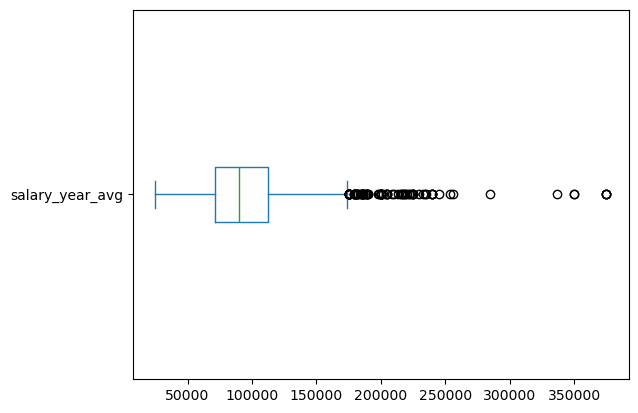

In [8]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x232b1df1040>,
 'caps': [<matplotlib.lines.Line2D at 0x232b1df15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x232b1df0ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x232b1df1b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x232b1df1dc0>],
 'means': []}

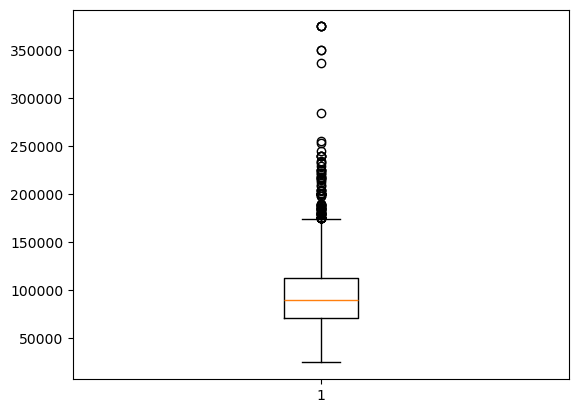

In [9]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\abc\AppData\Local\Temp\ipykernel_16416\3343614925.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=job_titles,vert=False)


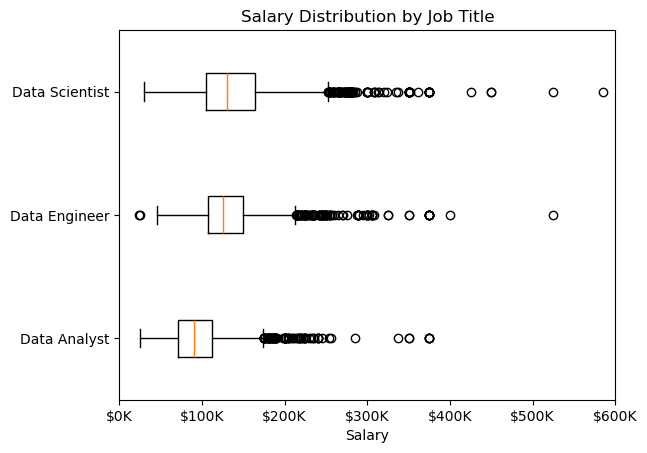

In [21]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])

job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg']  for job_title  in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

# 19 Exercise: Skill pay analysis

In [25]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [28]:
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)

df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


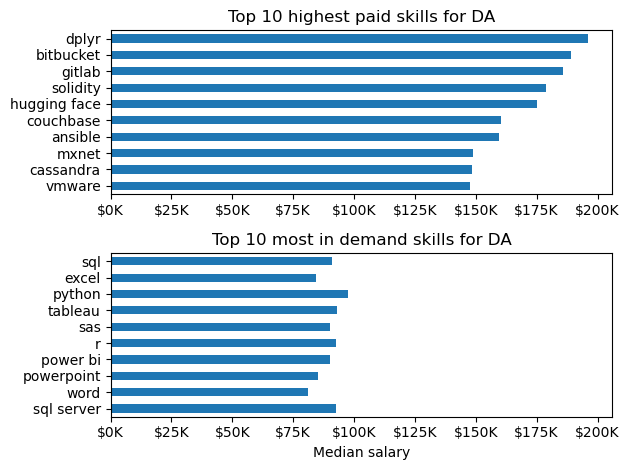

In [39]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for DA')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())  
ax[1].set_title('Top 10 most in demand skills for DA')
ax[1].set_xlabel('Median salary')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x  , pos: f'${int(x/1000)}K'))
fig.tight_layout()

#20 Seaborn

In [2]:
%pip install seaborn
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'